In [1]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline

import statsmodels.api as sm
from patsy import dmatrices



Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('train_all.csv', dtype=unicode)
df['review_scores_rating']=df['review_scores_rating'].astype(float)
df['log_price'] = df['log_price'].astype(float)
df['log_price'] = exp(df['log_price'])
df['number_of_reviews']=df['number_of_reviews'].astype(int)
df['review_scores_rating']=df['review_scores_rating'].astype(float)
df['host_response_rate']=df['host_response_rate'].str.rstrip('%').astype(float)
df['host_response_rate']=df['host_response_rate']/100


In [3]:
mask = df['host_has_profile_pic'] == 't'

print 'Mean of nightly rate with Host pic: $' + str(round(df[mask]['log_price'].mean(),2))
print 'Mean of nightly rate without a Host pic: $' + str(round(df[-mask]['log_price'].mean(),2))

Mean of nightly rate with Host pic: $141.11
Mean of nightly rate without a Host pic: $169.46


We can see that on average, a property with a host profile pic charges less.

In [4]:
mask = df['host_identity_verified'] == 't'

print 'Mean of nightly rate with ID verified: $' + str(round(df[mask]['log_price'].mean(),2))
print 'Mean of nightly rate without ID verified: $' + str(round(df[-mask]['log_price'].mean(),2))

Mean of nightly rate with ID verified: $143.0
Mean of nightly rate without ID verified: $137.17


In [6]:
mask = df['rare_True'] == '1'

print 'Mean of nightly rate with rare amentities: $' + str(round(df[mask]['log_price'].mean(),2))
print 'Mean of nightly rate without rare amentities: $' + str(round(df[-mask]['log_price'].mean(),2))

Mean of nightly rate with rare amentities: $166.28
Mean of nightly rate without rare amentities: $137.04


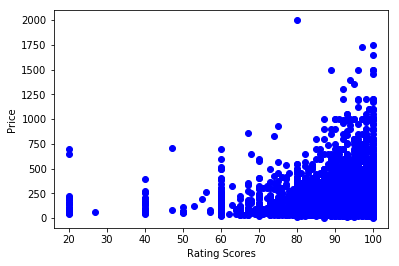

In [9]:
plot(df['review_scores_rating'], df['log_price'], marker='o', color='blue', linestyle='None')
xlabel('Rating Scores')
ylabel('Price')
#title('')
show()


We can see that on average, a property offering the rare amentities can charge a higher nightly rate.

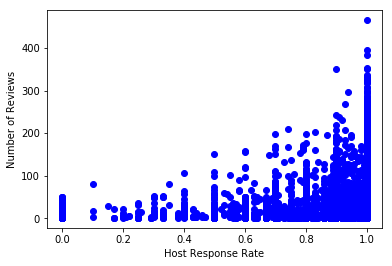

In [4]:
plot(df['host_response_rate'], df['number_of_reviews'], marker='o', color='blue', linestyle='None')
xlabel('Host Response Rate')
ylabel('Number of Reviews')
show()

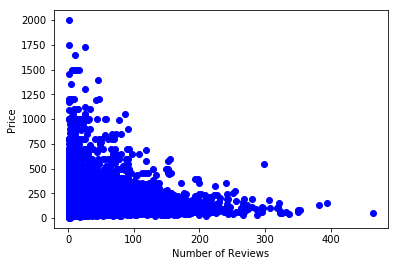

In [5]:
plot(df['number_of_reviews'], df['log_price'], marker='o', color='blue', linestyle='None')
xlabel('Number of Reviews')
ylabel('Price')
show()

Maybe price declines as number of reviews increase because the reviews are complaints, and everyone wirtes a reviews when they want to complain and warn others.

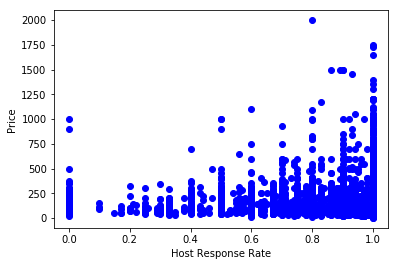

In [6]:
plot(df['host_response_rate'], df['log_price'], marker='o', color='blue', linestyle='None')
xlabel('Host Response Rate')
ylabel('Price')
show()

What is going on here? High response rate correlate to higher prices, and number of reviews. But having higher reviews correlates to lower prices? this seems like a paradox.

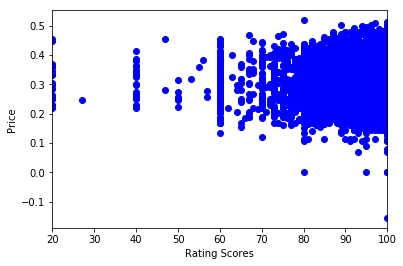

In [5]:
#df['log_price'] = log10(df['log_price'])
y, X = dmatrices('log_price ~ review_scores_rating', df, return_type='dataframe')
result = sm.OLS(y, X).fit()


slope = result.params['review_scores_rating']
intercept = result.params['Intercept']

predicted = df['review_scores_rating'] * slope + intercept
regression_predictions = Series(predicted.values,index=df['review_scores_rating'])

plot(df['review_scores_rating'], df['log_price'], marker='o', color='blue', linestyle='None')
regression_predictions.plot(label='Regression', linewidth=2, color='red')
xlabel('Rating Scores')
ylabel('Price')
                            

#plot(X,y, linestyle='None')
show()

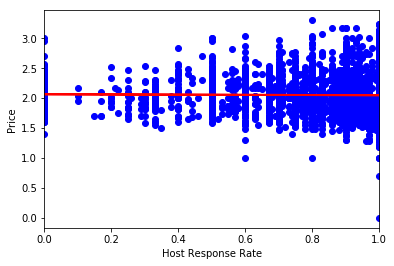

In [10]:
y, X = dmatrices('log_price ~ host_response_rate', df, return_type='dataframe')
result = sm.OLS(y, X).fit()


slope = result.params['host_response_rate']
intercept = result.params['Intercept']

predicted = df['host_response_rate'] * slope + intercept
regression_predictions = Series(predicted.values,index=df['host_response_rate'])

plot(df['host_response_rate'], df['log_price'], marker='o', color='blue', linestyle='None')
regression_predictions.plot(label='Regression', linewidth=2, color='red')
xlabel('Host Response Rate')
ylabel('Price')
                            

#plot(X,y, linestyle='None')
show()

In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.006
Date:                Fri, 09 Aug 2019   Prob (F-statistic):              0.316
Time:                        15:58:33   Log-Likelihood:                -2708.9
No. Observations:               17856   AIC:                             5422.
Df Residuals:                   17854   BIC:                             5437.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.0648      0.015    135.105      0.000       2.035       2.095
host_response_rate    -0.0159      0.016     -1.003      0.316      -0.047       0.015
==============================================================================
Omnibus:                      512.516   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              581.754
Skew:                           0.390   Prob(JB):                    4.72e-127
Kurtosis:                       3.415   Cond. No.                         14.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

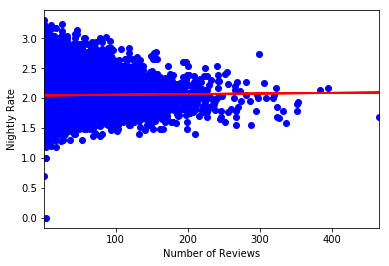

In [11]:
y, X = dmatrices('log_price ~ number_of_reviews', df, return_type='dataframe')
result = sm.OLS(y, X).fit()


slope = result.params['number_of_reviews']
intercept = result.params['Intercept']

predicted = df['number_of_reviews'] * slope + intercept
regression_predictions = Series(predicted.values,index=df['number_of_reviews'])

plot(df['number_of_reviews'], df['log_price'], marker='o', color='blue', linestyle='None')
regression_predictions.plot(label='Regression', linewidth=2, color='red')
xlabel('Number of Reviews')
ylabel('Nightly Rate')
                            

#plot(X,y, linestyle='None')
show()

In [14]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.535
Date:                Fri, 09 Aug 2019   Prob (F-statistic):             0.0601
Time:                        15:58:40   Log-Likelihood:                -2707.6
No. Observations:               17856   AIC:                             5419.
Df Residuals:                   17854   BIC:                             5435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.0467      0.003    780.664      0.000       2.042       2.052
number_of_reviews     0.0001   5.42e-05      1.880      0.060   -4.34e-06       0.000
==============================================================================
Omnibus:                      519.750   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              590.702
Skew:                           0.393   Prob(JB):                    5.38e-129
Kurtosis:                       3.418   Cond. No.                         60.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
y, X = dmatrices('log_price ~ host_has_profile_pic', df, return_type='dataframe')
result = sm.OLS(y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.207
Date:                Fri, 09 Aug 2019   Prob (F-statistic):             0.0733
Time:                        15:58:43   Log-Likelihood:                -2707.8
No. Observations:               17856   AIC:                             5420.
Df Residuals:                   17854   BIC:                             5435.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     2.1448      0.053     40.302      0.000       2.041       2.249
host_has_profile_pic[T.t]    -0.0954      0.053     -1.791      0.073      -0.200       0.009
==============================================================================
Omnibus:                      513.005   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.689
Skew:                           0.390   Prob(JB):                    2.96e-127
Kurtosis:                       3.417   Cond. No.                         50.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
y, X = dmatrices('log_price ~ host_identity_verified', df, return_type='dataframe')
result = sm.OLS(y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     29.36
Date:                Fri, 09 Aug 2019   Prob (F-statistic):           6.10e-08
Time:                        15:58:45   Log-Likelihood:                -2694.7
No. Observations:               17856   AIC:                             5393.
Df Residuals:                   17854   BIC:                             5409.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.0328      0.004    542.513      0.000       2.025       2.040
host_identity_verified[T.t]     0.0245      0.005      5.418      0.000       0.016       0.033
==============================================================================
Omnibus:                      521.643   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              592.373
Skew:                           0.395   Prob(JB):                    2.33e-129
Kurtosis:                       3.416   Cond. No.                         3.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
y, X = dmatrices('log_price ~ rare_True', df, return_type='dataframe')
result = sm.OLS(y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     117.6
Date:                Fri, 09 Aug 2019   Prob (F-statistic):           2.54e-27
Time:                        15:58:48   Log-Likelihood:                -2650.8
No. Observations:               17856   AIC:                             5306.
Df Residuals:                   17854   BIC:                             5321.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          2.0404      0.002    900.286      0.000       2.036       2.045
rare_True[T.1]     0.0655      0.006     10.846      0.000       0.054       0.077
==============================================================================
Omnibus:                      480.849   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              542.549
Skew:                           0.377   Prob(JB):                    1.54e-118
Kurtosis:                       3.400   Cond. No.                         2.94
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
y, X = dmatrices('log_price ~ rare_True + host_identity_verified', df, return_type='dataframe')
result = sm.OLS(y, X).fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     73.47
Date:                Fri, 09 Aug 2019   Prob (F-statistic):           1.67e-32
Time:                        15:58:50   Log-Likelihood:                -2636.2
No. Observations:               17856   AIC:                             5278.
Df Residuals:                   17853   BIC:                             5302.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                       2.0237      0.004    528.677      0.000       2.016       2.031
rare_True[T.1]                  0.0654      0.006     10.835      0.000       0.054       0.077
host_identity_verified[T.t]     0.0244      0.005      5.397      0.000       0.016       0.033
==============================================================================
Omnibus:                      489.869   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              552.788
Skew:                           0.382   Prob(JB):                    9.20e-121
Kurtosis:                       3.400   Cond. No.                         3.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
df.columns.values

array(['Unnamed: 0', 'id', 'log_price', 'property_type', 'room_type',
       'amenities', 'accommodates', 'bathrooms', 'bed_type',
       'cancellation_policy', 'cleaning_fee', 'city', 'description',
       'first_review', 'host_has_profile_pic', 'host_identity_verified',
       'host_response_rate', 'host_since', 'instant_bookable',
       'last_review', 'latitude', 'longitude', 'name', 'neighbourhood',
       'number_of_reviews', 'review_scores_rating', 'thumbnail_url',
       'zipcode', 'bedrooms', 'beds', 'amenities_strip', 'rare amenities',
       'rare_True'], dtype=object)

In [20]:
y, X = dmatrices('log_price ~ rare_True + host_identity_verified + C(cancellation_policy) + C(room_type) + C(bathrooms)+ C(bedrooms)+ C(neighbourhood)+ C(property_type)+ C(cleaning_fee)', df, return_type='dataframe')
result = sm.OLS(y, X).fit()

print result.summary()

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.723
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     186.7
Date:                Fri, 09 Aug 2019   Prob (F-statistic):               0.00
Time:                        15:58:58   Log-Likelihood:                 8746.9
No. Observations:               17856   AIC:                        -1.700e+04
Df Residuals:                   17609   BIC:                        -1.508e+04
Df Model:                         246                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [21]:
len(df['id'])

17856

In [6]:


df.columns


Index([u'Unnamed: 0', u'id', u'log_price', u'property_type', u'room_type',
       u'amenities', u'accommodates', u'bathrooms', u'bed_type',
       u'cancellation_policy', u'cleaning_fee', u'city', u'description',
       u'first_review', u'host_has_profile_pic', u'host_identity_verified',
       u'host_response_rate', u'host_since', u'instant_bookable',
       u'last_review', u'latitude', u'longitude', u'name', u'neighbourhood',
       u'number_of_reviews', u'review_scores_rating', u'thumbnail_url',
       u'zipcode', u'bedrooms', u'beds', u'amenities_strip', u'rare amenities',
       u'rare_True', u'medium amenities', u'rare_medium_True',
       u'amenities_freq', u'more_amenities', u'cluster'],
      dtype='object')

In [8]:
mask = df['cluster'] == '2'

clust = df[mask]
clust.head()

,Unnamed: 0,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,...,bedrooms,beds,amenities_strip,rare amenities,rare_True,medium amenities,rare_medium_True,amenities_freq,more_amenities,cluster
34,154,2050565,0.452562,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",4,2,Real Bed,strict,...,3,3,"['Wireless Internet', 'Air conditioning', 'Buz...","['Children\xe2\x80\x99s books and toys', 'Wind...",1,"['Hair dryer', 'Carbon monoxide detector', 'La...",1,23,1,2
64,291,9550807,0.483072,Apartment,Entire home/apt,"{""Cable TV"",""Wireless Internet"",""Air condition...",4,1,Real Bed,strict,...,1,2,"['Cable TV', 'Wireless Internet', 'Air conditi...",[],0,"['Hair dryer', 'Carbon monoxide detector', 'La...",1,9,0,2
137,580,1864757,0.483072,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",8,1,Real Bed,strict,...,3,5,"['Cable TV', 'Wireless Internet', 'Air conditi...",[],0,"['Hair dryer', 'Carbon monoxide detector', 'La...",1,14,0,2
294,1209,6104431,0.474876,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",12,2,Real Bed,strict,...,4,6,"['Cable TV', 'Wireless Internet', 'Air conditi...",['Ethernet connection'],1,"['Hair dryer', 'Carbon monoxide detector', 'La...",1,17,0,2
303,1253,4710084,0.449156,Bed & Breakfast,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,2,Real Bed,strict,...,2,3,"['Cable TV', 'Wireless Internet', 'Air conditi...",[],0,"['Hair dryer', 'Carbon monoxide detector', 'La...",1,15,0,2


Text(0.5,1,'Instant Bookable')

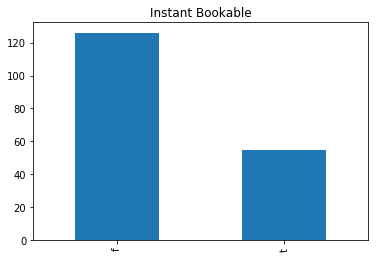

In [44]:
clust['instant_bookable'].value_counts()[:10].plot(kind='bar')
title('Instant Bookable')

Text(0.5,1,'Host ID Verified')

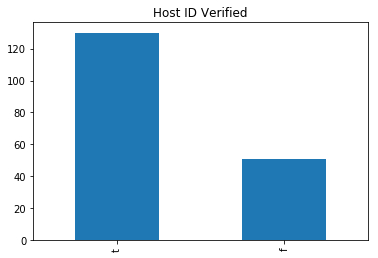

In [43]:
clust['host_identity_verified'].value_counts()[:10].plot(kind='bar')
title('Host ID Verified')

Text(0.5,1,'Most Popular Neighborhoods')

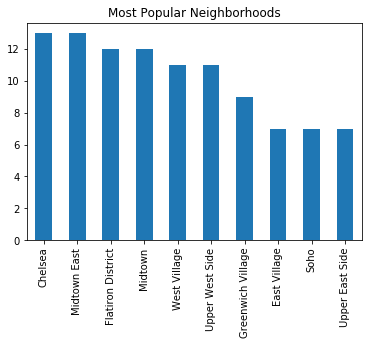

In [42]:
clust['neighbourhood'].value_counts()[:10].plot(kind='bar')
title('Most Popular Neighborhoods')

Text(0.5,1,'Cleaning Fee')

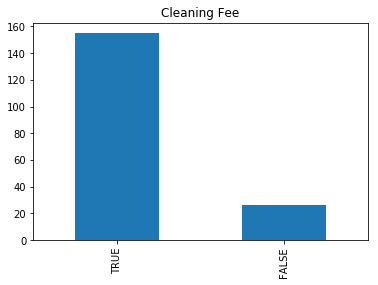

In [53]:
clust['cleaning_fee'].value_counts()[:10].plot(kind='bar')
title('Cleaning Fee')

C:\Users\chris\Anaconda3\envs\py\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Text(0.5,1,'Range of Listed Amenities')

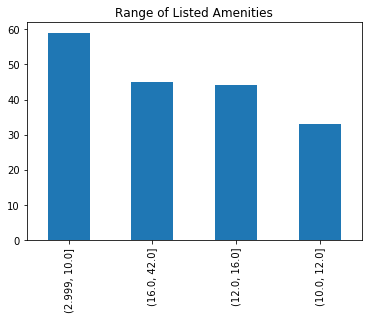

In [54]:
clust['amenities_freq'] = clust['amenities_freq'].astype(float)
pd.qcut(clust['amenities_freq'],4).value_counts().plot(kind='bar')
title('Range of Listed Amenities')

Text(0.5,1,'Have the Rare Amenities')

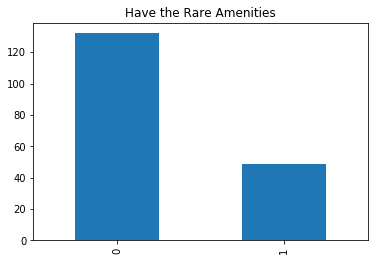

In [46]:
clust['rare_True'].value_counts()[:10].plot(kind='bar')
title('Have the Rare Amenities')

Text(0.5,1,'Number of Beds')

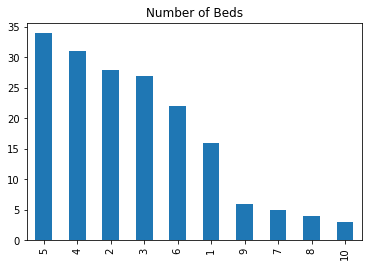

In [47]:
clust['beds'].value_counts()[:10].plot(kind='bar')
title('Number of Beds')

Text(0.5,1,'Cancellation Policy')

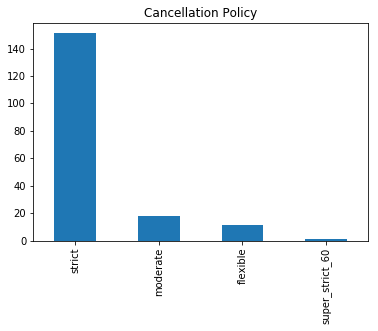

In [48]:
clust['cancellation_policy'].value_counts()[:10].plot(kind='bar')
title('Cancellation Policy')

Text(0.5,1,'Number of Bedrooms')

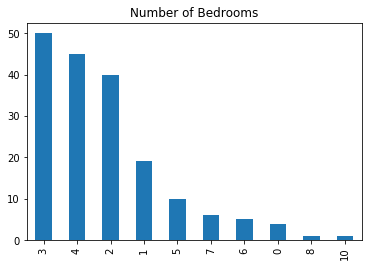

In [49]:
clust['bedrooms'].value_counts()[:10].plot(kind='bar')
title('Number of Bedrooms')

Text(0.5,1,'Number of Bathrooms')

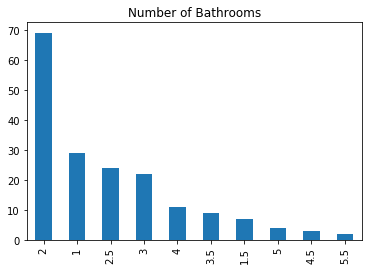

In [50]:
clust['bathrooms'].value_counts()[:10].plot(kind='bar')
title('Number of Bathrooms')

Text(0.5,1,'How Many Peple it can Acommodate')

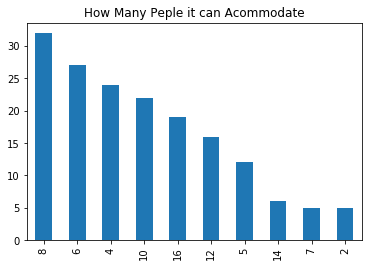

In [52]:
clust['accommodates'].value_counts()[:10].plot(kind='bar')
title('How Many Peple it can Acommodate')